In [1]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
from pprint import pprint
import pyphi

import phial.toolbox as tb
import phial.node_functions as nf
import phial.experiment as ex
from phial.utils import tic,toc
from phial.experiment import Experiment
tic() # start tracking time of Notebook load

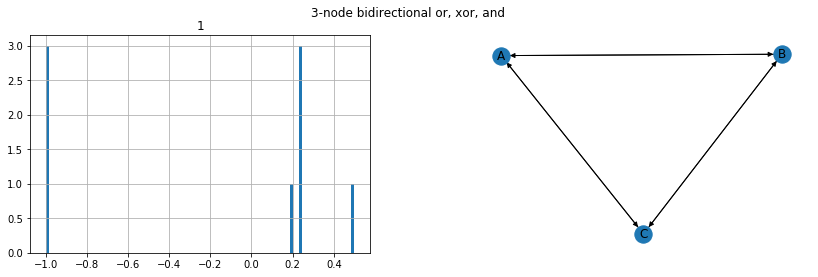

In [2]:
exp1 = Experiment(
    [('A', 'B'), ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs = dict(A=nf.OR_func, B=nf.AND_func, C=nf.XOR_func),
    title='3-node bidirectional or, xor, and',  # used in Mayner 2018 paper
)
exp1.run(countUnreachable=True)
#exp1.results

In [3]:
pprint(exp1.info())

{'duration': 0.6261319679906592,
 'filename': None,
 'results': {'000': 0.194445,
             '001': 0.243056,
             '010': 0.243056,
             '011': -1,
             '100': 0.243056,
             '101': -1,
             '110': -1,
             '111': 0.499999},
 'timestamp': '2020-05-11 13:48:27.220305',
 'uname': uname_result(system='Linux', node='chimp20', release='5.3.0-51-generic', version='#44~18.04.2-Ubuntu SMP Thu Apr 23 14:27:18 UTC 2020', machine='x86_64', processor='x86_64')}


In [4]:
exp1.net.info()

{'edges': [('A', 'B'),
  ('A', 'C'),
  ('B', 'A'),
  ('B', 'C'),
  ('C', 'A'),
  ('C', 'B')],
 'nodes': ['A(0): 2,OR_func', 'B(1): 2,AND_func', 'C(2): 2,XOR_func'],
 'num_unreachable_states': 3}

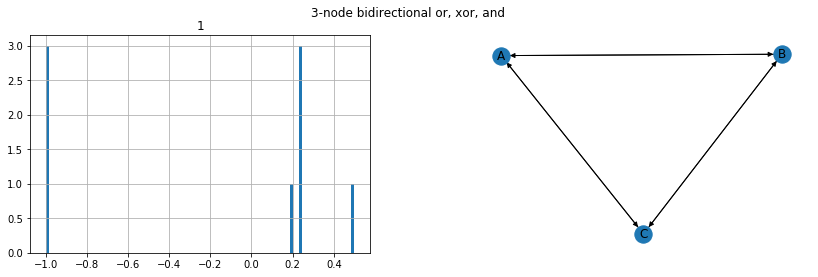

In [5]:
exp = Experiment(['AB','AC', 'BA', 'BC', 'CA', 'CB'],
    funcs = dict(A=nf.OR_func, B=nf.AND_func, C=nf.XOR_func),
    title='3-node bidirectional or, xor, and',  
    comment='Used in Mayner 2018 paper'
)
exp.run(countUnreachable=True)

In [6]:
exp.net.tpm

,A,B,C
000,0,0,0
100,0,0,0
010,0,0,0
110,0,0,1
001,0,0,0
101,0,1,0
011,1,0,0
111,1,1,1


In [7]:
exp.results  # 2/4 state compliment pairs have same phi

{'010': 0.243056,
 '100': 0.243056,
 '000': 0.194445,
 '111': 0.499999,
 '001': 0.243056,
 '011': -1,
 '101': -1,
 '110': -1}

In [8]:
exp.info()

{'timestamp': '2020-05-11 13:48:28.140636',
 'duration': 0.6003079549409449,
 'results': {'010': 0.243056,
  '100': 0.243056,
  '000': 0.194445,
  '111': 0.499999,
  '001': 0.243056,
  '011': -1,
  '101': -1,
  '110': -1},
 'filename': None,
 'uname': uname_result(system='Linux', node='chimp20', release='5.3.0-51-generic', version='#44~18.04.2-Ubuntu SMP Thu Apr 23 14:27:18 UTC 2020', machine='x86_64', processor='x86_64')}

In [9]:
len(exp.net)

3

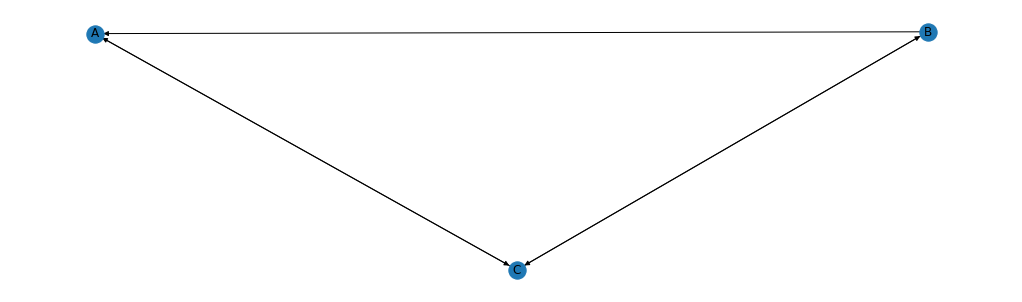

In [10]:
import pyphi.examples as ex
network = ex.basic_network()
net0 = tb.pyphi_network_to_net(network)
net0.draw()

In [11]:
net0.info()

{'edges': [('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')],
 'nodes': ['A(0): 2,MJ_func', 'B(1): 2,MJ_func', 'C(2): 2,MJ_func'],
 'num_unreachable_states': 2}

## From Larissa's 2015 paper https://www.mdpi.com/1099-4300/17/8/5472

In [12]:
import numpy as np
tpm=np.array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
cm=np.array([[1, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 1]], dtype=np.uint8)
G = nx.DiGraph(cm)
net = tb.Net(edges=G.edges(), tpm=tpm)
net.info()

{'edges': [('A', 'A'),
  ('A', 'B'),
  ('A', 'F'),
  ('B', 'A'),
  ('B', 'B'),
  ('B', 'C'),
  ('C', 'B'),
  ('C', 'C'),
  ('C', 'D'),
  ('D', 'C'),
  ('D', 'D'),
  ('D', 'E'),
  ('E', 'D'),
  ('E', 'E'),
  ('E', 'F'),
  ('F', 'A'),
  ('F', 'E'),
  ('F', 'F')],
 'nodes': ['A(0): 2,MJ_func',
  'B(1): 2,MJ_func',
  'C(2): 2,MJ_func',
  'D(3): 2,MJ_func',
  'E(4): 2,MJ_func',
  'F(5): 2,MJ_func'],
 'num_unreachable_states': 32}

In [13]:
%time net.phi('000011')

Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 0, 1, 1]


CPU times: user 1.35 s, sys: 160 ms, total: 1.51 s
Wall time: 27.1 s


20.906248

                                                                    Process Process-348:
Process Process-347:
Process Process-351:
Process Process-346:
Process Process-345:
Process Process-352:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Process Process-350:
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-349:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pothiers/sandbox/ph

  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/parallel.py", line 176, in worker
    result_queue.put(compute(obj, *context))
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/parallel.py", line 176, in worker
    result_queue.put(compute(obj, *context))
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/subsystem.py", line 168, in compute
    return evaluate_cut(subsystem, cut, unpartitioned_ces)
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/subsystem.py", line 168, in compute
    return evaluate_cut(subsystem, cut, unpartitioned_ces)
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/parallel.py", line 176, in worker
    result_queue.put(compute(obj, *context))
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/subsystem.py", line 139, in evaluate_cut
    partitioned_ces = ces(cu

  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/subsystem.py", line 661, in potential_purviews
    return irreducible_purviews(self.cm, direction, mechanism, purviews)
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/subsystem.py", line 687, in find_mice
    for purview in purviews)
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/parallel.py", line 295, in run_sequential
    r = self.compute(obj, *self.context)
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/parallel.py", line 176, in worker
    result_queue.put(compute(obj, *context))
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/subsystem.py", line 687, in <genexpr>
    for purview in purviews)
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/subsystem.py", line 47, in compute
    effect_purviews=effect_purviews)
  File "/home/pothiers/sandbox/p

  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/parallel.py", line 318, in run
    return self.run_sequential()
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/connectivity.py", line 153, in block_reducible
    return block_cm(cm)
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/connectivity.py", line 125, in block_cm
    sinks = outputs_of(sources)
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/parallel.py", line 295, in run_sequential
    r = self.compute(obj, *self.context)
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/compute/subsystem.py", line 47, in compute
    effect_purviews=effect_purviews)
  File "/home/pothiers/sandbox/phial/venv/lib/python3.6/site-packages/pyphi/connectivity.py", line 104, in outputs_of
    return np.where(cm[nodes, :].sum(0))[0]
  File "<decorator-gen-842>", line 2, in concept
KeyboardInterrupt
  Fil

KeyboardInterrupt: 

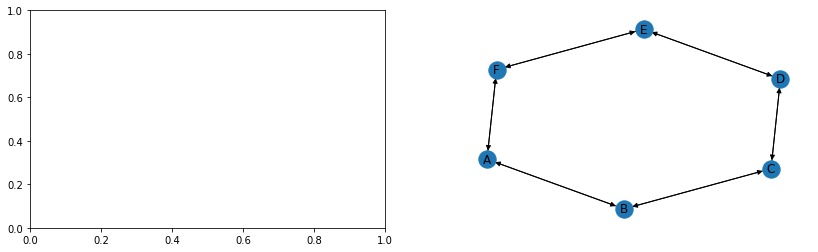

In [14]:
exp = Experiment([],
    net=net,
    title='High Phi in 6 nodes',
    comment='From Larissas 2015 paperm https://www.mdpi.com/1099-4300/17/8/5472',
    )
exp.run()

In [ ]:
exp.info()

In [ ]:
import pyphi.convert
import pandas as pd
tpm_sbs = pyphi.convert.state_by_node2state_by_state(tpm)
states = tb.all_states(len(net), backwards=True)
tpm_df = pd.DataFrame(tpm_sbs, index=states, columns=states)
tpm_df
S = nx.DiGraph(tpm_df)
nx.draw(S, pos=pydot_layout(S), with_labels=True)

In [ ]:
import datetime
elapsed = toc()  # Seconds since start of Notebook load (assuming fresh run)
print(f'Elapsed seconds={elapsed}')
print(f'Completed on: {str(datetime.datetime.now())}')